In [104]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [89]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df2 = pd.read_csv(url)
df2.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [96]:
#define independent and dependent variables
x = df2[['highway-mpg']]
y = df2['price']


In [97]:
#fit the model 
lm.fit(x,y)

LinearRegression()

In [18]:
#get predictions
yhat = lm.predict(x)


In [95]:
yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [102]:
price = 38423.30 + (-821.73 * 27)
price

16236.590000000004

In [19]:
#intercept
lm.intercept_

array([38423.30585816])

In [26]:
#slope
lm.coef_

array([[-821.73337832]])

(0.0, 48185.27998581097)

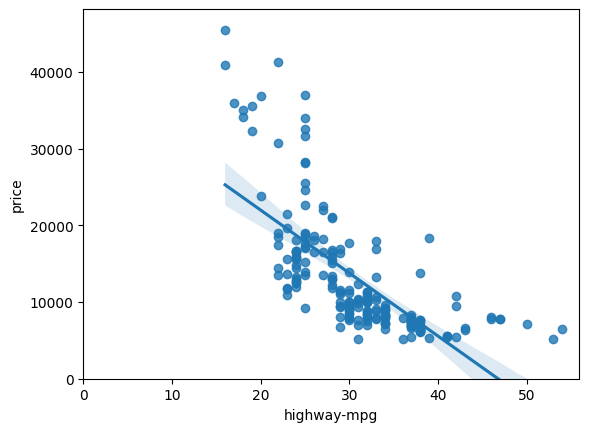

In [113]:
sns.regplot(x = x,y = y, data= df2)
#intercept of the above model is only visible on the plot if xlim is adjusted; otherwise the y axis starts from -10000 
#so the intercept will look different 
plt.xlim(0,)
plt.ylim(0,)

#notice the line here is made by sns not the linear model




In [28]:
#linear model
# price = 38423.31 - 821.70 * highway-mpg

In [114]:
#multiple linear regression
z = df2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [115]:
lm.fit(z, df2['price'])

LinearRegression()

In [116]:
lm.intercept_

-15806.62462632923

In [117]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [35]:
yhat = lm.predict(z)
yhat

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

### Model Evaluation with visualization
to see whther the regression model is good or not, first look at the residual plot 
then check distribution plot 

(0.0, 48184.63812471639)

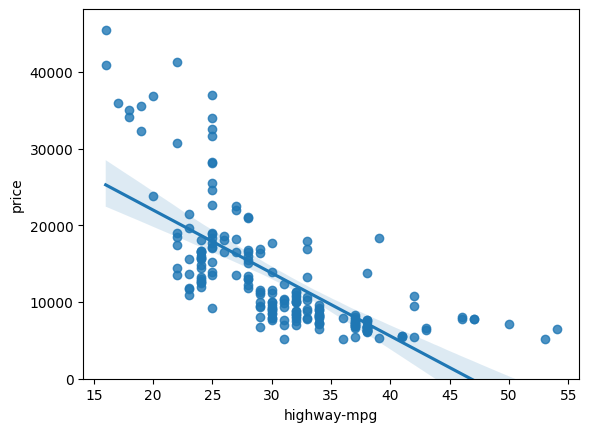

In [37]:
#start with simple regression plot 
sns.regplot(x = 'highway-mpg', y = 'price', data = df2)
plt.ylim(0,)
# if the dots are not clustered around the regression line, then probably linear regression is not the best model

(0.0, 48165.3876932739)

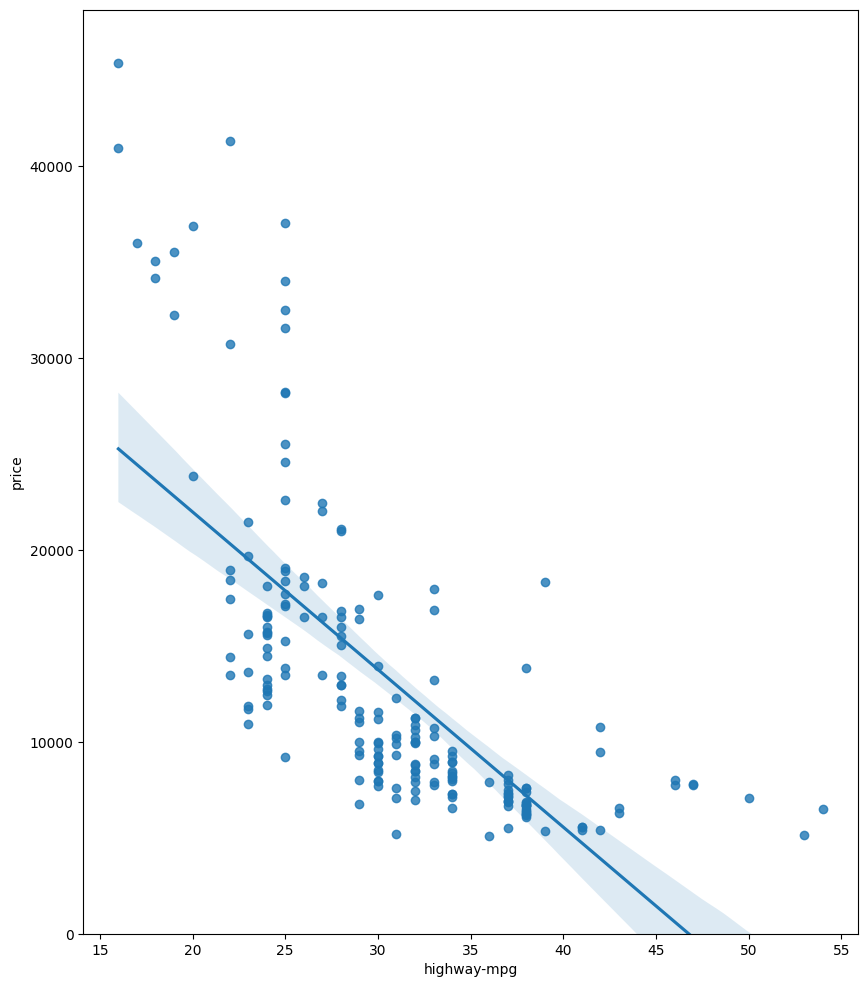

In [124]:
height = 10
width =12
plt.figure(figsize=(height,width))
sns.regplot(x = 'highway-mpg', y = 'price', data = df2)
plt.ylim(0,)



In [125]:
#we can first check correlations 
df2[['highway-mpg', 'engine-size', 'price']].corr()

,highway-mpg,engine-size,price
highway-mpg,1.000000,-0.679571,-0.704692
engine-size,-0.679571,1.000000,0.872335
price,-0.704692,0.872335,1.000000


<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

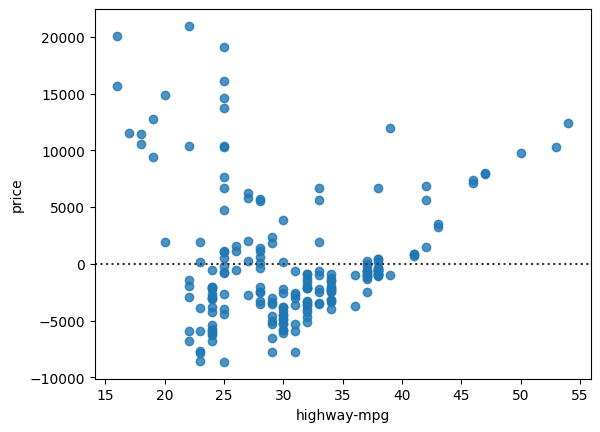

In [41]:
#residual plot
sns.residplot(x = 'highway-mpg', y = 'price', data = df2)
#residuals have a curvature which means the variance is not constant so we can't use linear model 

C:\Users\17063\AppData\Local\Temp\ipykernel_8740\2359713336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df2['price'], hist=False, color='r', label='Actual Value')


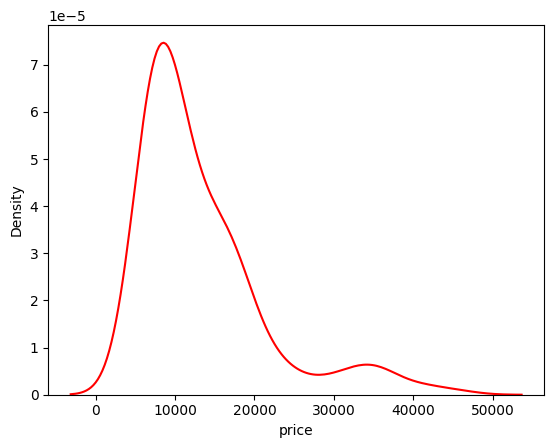

In [45]:
axl = sns.distplot(df2['price'], hist=False, color='r', label='Actual Value')

C:\Users\17063\AppData\Local\Temp\ipykernel_8740\1791788483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df2['price'], hist=False, color='r', label='Actual Value')
C:\Users\17063\AppData\Local\Temp\ipykernel_8740\1791788483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<AxesSubplot: xlabel='price', ylabel='Density'>

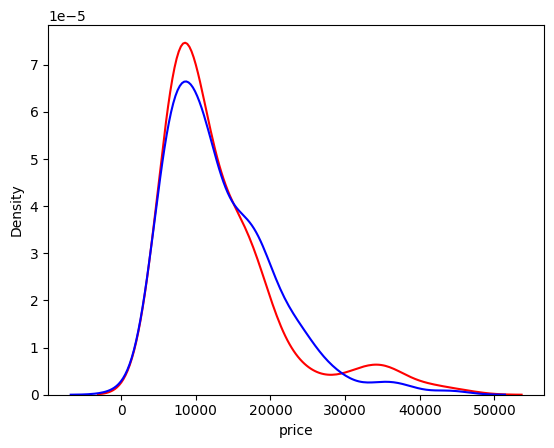

In [53]:
#when working with multiple regression, residual plot is not helpful so we use density plots to check the model 
axl = sns.distplot(df2['price'], hist=False, color='r', label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax = axl)

In [ ]:
#polynomial regression 
#second-order or quadratic polynomial regression 
#third-order or cubic polynomial regression 

In [54]:
import numpy as np

In [56]:
#make a polynomial regression instead of linear one 
f = np.polyfit(df2['highway-mpg'], df2['price'], 3)
p = np.poly1d(f)
print(p)

#numpy doesn't work with much more complicated stuff so you may switch to sklearn 

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
pr = PolynomialFeatures(degree= 2, include_bias=False)

In [60]:
x_polly = pr.fit_transform(df2[['horsepower', 'curb-weight']])

In [62]:
#normalize features
from sklearn.preprocessing import StandardScaler

In [66]:
SCALE = StandardScaler()
SCALE.fit(df2[['horsepower', 'curb-weight']])

StandardScaler()

In [67]:
x_scale = SCALE.transform(df2[['horsepower', 'curb-weight']])

there steps in making regression; for example: 

Normalization --> polynomial transform --> Linear Regression 

So we might use pipeline to make things easier  

In [68]:
from sklearn.pipeline import Pipeline

In [70]:
#first elements in the tuple below like scale, polynomial etc. contains the names of estimators 
#the second element like StandardScaler are model constructors 
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree= 2)), ('mode', LinearRegression())]

In [71]:
pipe = Pipeline(input)

Model Evaluation can be done in two different ways 

first, by visualization like residual plot or density plot of predcited and actual values 

second,it can be done by using numerical values like MSE or R-squared 

In [72]:
#Mean Squared Error 

from sklearn.metrics import mean_squared_error

In [126]:
#mean squared error 
mean_squared_error(df2['price'], yhat)

11980366.87072649

In [80]:
# R Squared 
x = df2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df2[['price']]
lm.score(x,y)

0.8093562806577457

In [83]:
#fit the model then check the price for a new car
lm.fit(df2[['highway-mpg']], df2[['price']])


LinearRegression()

In [87]:
#predict based on regression 
lm.predict(np.array(30.0).reshape(-1,1))

c:\Users\17063\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13771.3045085]])

In [129]:
#polynomial regression
x = df2['highway-mpg']
y=df2['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [130]:
# R squared for polynomial 
from sklearn.metrics import r2_score
r2_score(y, p(x))

0.6741946663906517

In [132]:
#mean squared error for the polynomial regression 
mean_squared_error(df2['price'], p(x))

20474146.42636122